## Generating assimilation rate vs light intensity curve equation from data

Tissue: Arabidopsis leaf  
Publication: Donahue, R. A., Poulson, M. E., & Edwards, G. E. (1997). A method for measuring whole plant photosynthesis in Arabidopsis thaliana. Photosynthesis Research, 52(3), 263-269.  
Data extracted from Fig 3 using WebPlotDigitzer:

|    PPFD_At |   netCO2_At   |
|------------|---------------|
|    31      |       0.6     | 
|    132     |       4       | 
|    287     |       8       | 
|    411     |       10.7    | 
|    691     |       15.6    | 
|    1041    |       20.7    | 
|    1243    |       22.3    | 
|    1414    |       23.3    | 
|    1600    |       23.7    | 

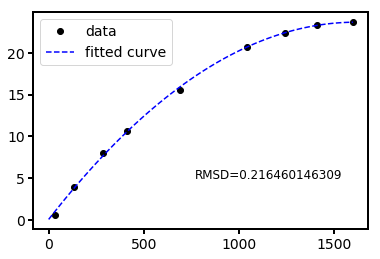

Equation form:
y = a + bx + cx^2
a = 0.08713510155619275
b = 0.029144167019676457
c = -9.013134000630284e-06


In [2]:
# Arabidopsis data
PPFD_At = [31,132,287,411,691,1041,1243,1414,1600]
netCO2_At = [0.6,4,8,10.7,15.6,20.7,22.3,23.3,23.7]

# 2nd degree polynomial fitting
import numpy as np
p = np.poly1d(np.polyfit(PPFD_At, netCO2_At, 2))

# plot to check curve fitting
import matplotlib.pyplot as plt
get_ipython().magic(u'matplotlib inline')

plt.rcParams.update({'font.size': 14}) #sets a global fontsize
plt.rcParams['xtick.major.size'] = 5 # adjusts tick line length and width
plt.rcParams['xtick.major.width'] = 2
plt.rcParams['ytick.major.size'] = 5
plt.rcParams['ytick.major.width'] = 2
plt.rcParams['axes.linewidth']=2 # makes axes line thicker

t = np.linspace(0, 1601, 100)
plt.plot(PPFD_At, netCO2_At, 'ko',label="data")
# p(t) was used to generate y values for fitted curve
plt.plot(t, p(t), 'b--',label="fitted curve")

# calculate and add RMSD to plot
SSE = 0
for i in range(0,len(PPFD_At)):
    SSE=SSE+((p(PPFD_At[i])-netCO2_At[i])**2)

MSE = float(SSE)/len(PPFD_At)
RMSE = (MSE)**0.5
plt.text(770,5,"RMSD="+str(RMSE),fontsize=12)
plt.legend()
plt.show()

# print equation
print("Equation form:\ny = a + bx + cx^2\na = "+str(p[0])+"\nb = "+str(p[1])+"\nc = "+str(p[2]))
